In [4]:
# # 1. تثبيت مكتبة Kaggle
# #!pip install -q kaggle

# from google.colab import files
# files.upload()

# # 3. إنشاء مجلد وإعداد الاتصال
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# # 4. تحميل البيانات
# !kaggle datasets download -d datamunge/sign-language-mnist

# # 5. فك الضغط
# !unzip -q sign-language-mnist.zip -d sign-language-mnist_data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# تحميل ملفات CSV
train_df = pd.read_csv('/content/sign-language-mnist_data/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign-language-mnist_data/sign_mnist_test.csv')

# معاينة البيانات
print(train_df.shape)
train_df.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
# فصل الميزات عن التصنيفات
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# تحويل القيم إلى صور 28x28
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encoding للتصنيفات
y_train_cat = to_categorical(y_train, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(25, activation='softmax')  # 25 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat))

Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3707 - loss: 2.1569 - val_accuracy: 0.7660 - val_loss: 0.6455
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9430 - loss: 0.2249 - val_accuracy: 0.8617 - val_loss: 0.4097
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0405 - val_accuracy: 0.8826 - val_loss: 0.3761
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9997 - loss: 0.0123 - val_accuracy: 0.8949 - val_loss: 0.3862
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8897 - val_loss: 0.4246
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9046 - val_loss: 0.4071
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 0.8575 - val_loss: 0.5402
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9919 - loss: 0.0294 - val_accuracy: 0

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9084 - loss: 0.4203
اختبار الدقة: 0.91


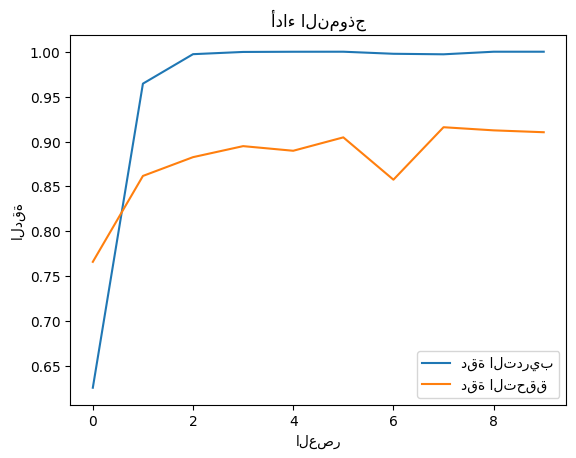

In [ ]:
# التقييم
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f'اختبار الدقة: {test_acc:.2f}')

# رسم الأداء
plt.plot(history.history['accuracy'], label='دقة التدريب')
plt.plot(history.history['val_accuracy'], label='دقة التحقق')
plt.legend()
plt.xlabel('العصر')
plt.ylabel('الدقة')
plt.title('أداء النموذج')
plt.show()

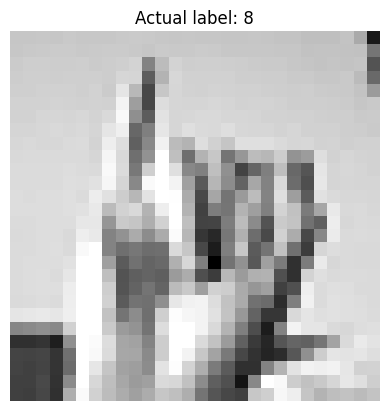

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
Predicted label: 8


In [ ]:
# تجربة التنبؤ على صورة واحدة
index = 10
img = X_test[index]

plt.imshow(img.squeeze(), cmap='gray')
plt.title("Actual label: " + str(y_test[index]))
plt.axis('off')
plt.show()

# التنبؤ
pred = model.predict(np.expand_dims(img, axis=0))
print("Predicted label:", np.argmax(pred))

In [ ]:
model1 = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(25, activation='softmax')  # 25 classes
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,673 (1.69 MB)

 Trainable params: 442,777 (1.69 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
history1 = model1.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat))

Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7101 - loss: 1.0308 - val_accuracy: 0.4646 - val_loss: 1.9547
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9925 - loss: 0.0270 - val_accuracy: 0.8238 - val_loss: 0.5351
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9976 - loss: 0.0096 - val_accuracy: 0.8592 - val_loss: 0.6298
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9977 - loss: 0.0086 - val_accuracy: 0.8240 - val_loss: 0.6330
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.6610 - val_loss: 1.5741
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9952 - loss: 0.0197 - val_accuracy: 0.9247 - val_loss: 0.2915
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9573 - val_loss: 0.2155
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8999 - loss: 0.4866
اختبار الدقة: 0.90


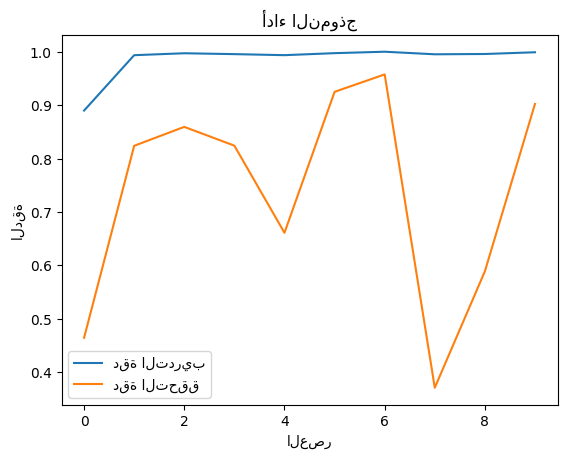

In [ ]:
# التقييم
test_loss, test_acc = model1.evaluate(X_test, y_test_cat)
print(f'اختبار الدقة: {test_acc:.2f}')

# رسم الأداء
plt.plot(history1.history['accuracy'], label='دقة التدريب')
plt.plot(history1.history['val_accuracy'], label='دقة التحقق')
plt.legend()
plt.xlabel('العصر')
plt.ylabel('الدقة')
plt.title('أداء النموذج')
plt.show()